# Ming Xie formula example

In [1]:
from zfel import mingxie

In [2]:
# Function signature
?mingxie

Signature:
mingxie(
    sigma_x=None,
    und_lambda=None,
    und_k=None,
    current=None,
    gamma=None,
    norm_emit=None,
    sigma_E=None,
)
Docstring:
Calculates gain length using the Ming Xie formula.

Design Optimization for an X-ray Free Elecgron Laser Driven by SLAC Linac
Ming Xie, Lawrence Berkeley Laboratory, Berkeley, CA 94720, USA
http://accelconf.web.cern.ch/AccelConf/p95/ARTICLES/TPG/TPG10.PDF

Inputs keyword arguments:
    sigma_x      # RMS beam size
    und_lambda   # Undulator period (m)
    und_k        # Undulator K
    current      # Beam current (A)
    gamma        # Relativistic gamma 
    norm_emit    # Normalized emittance (m-rad)
    sigma_E      # RMS energy spread (eV)


Output as dict:
    gain_length        # Gain length (m)
    saturation_length  # Saturation length (m)
    saturation_power   # Saturation power (W)
    fel_wavelength     # FEL wavelength (m)
    pierce_parameter   # Pierce parameter (rho) 
File:      ~/Code/GitHub/zfel/zfel/mingxie.

In [3]:
# Some test parameters
test_params = {    
    'sigma_x':18e-6,
    'und_lambda':0.03,
    'und_k':3.7,
    'current':5000.,
    'gamma':15000/0.511,
    'norm_emit':1e-6,
    'sigma_E':3e6}


mingxie(**test_params) 

{'gain_length': 3.3615068621783646,
 'saturation_length': 61.57236107233048,
 'saturation_power': 27797096498.658634,
 'fel_wavelength': 1.3656628299999998e-10,
 'pierce_parameter': 0.0007257957842039326}

# Vectorized version
The function will also work with inputs vectorized as numpy arrays. Here is an example scanning sigma_x

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
n = 20
test_params2 = {}
# Duplicate all values
for k,v in test_params.items():
    test_params2[k] = np.array(n*[v])

# Vary sigma_x 
sx0 = test_params['sigma_x']
sx1 = 2*sx0
test_params2['sigma_x'] = np.linspace(sx0, sx1, n)    

# Calculate
result = mingxie(**test_params2)   
result

{'gain_length': array([3.36150686, 3.32585658, 3.30852171, 3.30590641, 3.31526357,
        3.33446805, 3.36185717, 3.39611655, 3.43619729, 3.48125509,
        3.53060491, 3.58368683, 3.64004011, 3.69928324, 3.76109848,
        3.82521978, 3.89142325, 3.95951962, 4.02934818, 4.10077195]),
 'saturation_length': array([61.57236107, 61.33146812, 61.36922496, 61.6335245 , 62.08397209,
        62.68891616, 63.42331198, 64.26716376, 65.20437429, 66.22188546,
        67.30902948, 68.45703405, 69.65864165, 70.90781394, 72.19950047,
        73.52945639, 74.8940976 , 76.29038502, 77.71573144, 79.16792625]),
 'saturation_power': array([2.77970965e+10, 2.93840283e+10, 3.06744364e+10, 3.16907401e+10,
        3.24599221e+10, 3.30105488e+10, 3.33707930e+10, 3.35672244e+10,
        3.36241540e+10, 3.35633548e+10, 3.34040247e+10, 3.31628954e+10,
        3.28544219e+10, 3.24910082e+10, 3.20832425e+10, 3.16401255e+10,
        3.11692818e+10, 3.06771522e+10, 3.01691629e+10, 2.96498750e+10]),
 'fel_waveleng

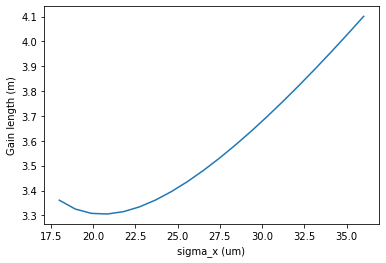

In [6]:
# Plot
fig, ax = plt.subplots()
ax.set_xlabel('sigma_x (um)')
ax.set_ylabel('Gain length (m)')
ax.plot(1e6*test_params2['sigma_x'], result['gain_length'])

# Contour plot

Reproduction of a plot similar to Figure 2 in the originam Ming Xie paper

Text(0.5, 0, 'Current (kA)')

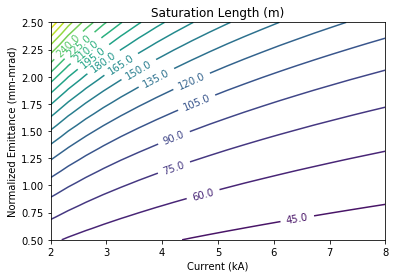

In [8]:
i_x =20
i_y = 20
felwave = 1.5e-10
beta = 18
undL = 0.03
K = 3.7
sigmae = 3e6
I = np.linspace(2000, 8000, i_x)
norm_emit = np.linspace(0.5e-6, 2.5e-6, i_y);
gamma=np.sqrt(undL*(1+K**2/2)/2/felwave)
sigma_x = np.sqrt(beta*norm_emit/gamma)

test_params = {    
    'sigma_x':sigma_x[0],
    'und_lambda':undL,
    'und_k':K,
    'current':5000.,
    'gamma':gamma,
    'norm_emit':1e-6,
    'sigma_E':sigmae
}

X,Y = np.meshgrid(I, norm_emit)

contour = np.zeros((i_y, i_x))
for i in range(0, len(sigma_x)):
    test_params['current'] = X[i]
    test_params['norm_emit'] = Y[i]
    test_params['sigma_x'] = sigma_x[i]
    out = mingxie(**test_params)
    contour[i][:] = out['saturation_length']

fig, ax = plt.subplots()
c = ax.contour(X/1000, Y*1e6, contour, 25)
ax.clabel(c, inline=1, fontsize=10, fmt='%1.1f')
ax.set_title('Saturation Length (m)')
ax.set_ylabel('Normalized Emittance (mm-mrad)')
ax.set_xlabel('Current (kA)')